### Experiment-6

# Aim - Using Naive Bayesian Classifier  to analyse the diabetes_classifier 

## Algorithm used: Naive Bayes Algorithm
* Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.
* It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.



 ## PYTHON  CODE

In [31]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss
SEED = 42

In [10]:
titanic=pd.read_csv("datasets\\train_for_Titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#this following do not play in prediction therefore dropping
titanic=titanic.drop(columns=['Name','Cabin','PassengerId','Ticket'])
#age null values imputed with mean 
titanic['Age'].fillna(value=titanic['Age'].mean(),inplace=True)
#dropping the 2 null values of embarked
titanic=titanic.dropna()

In [14]:
titanic.drop_duplicates(inplace=True)
print(titanic.shape)


(778, 8)


In [15]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,0.411311,2.249357,29.745666,0.526992,0.419023,34.712987
std,0.492388,0.853206,13.674550,0.988956,0.839346,52.280326
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.250000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.890600
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Heatmap for Highest correlated features for given datset')

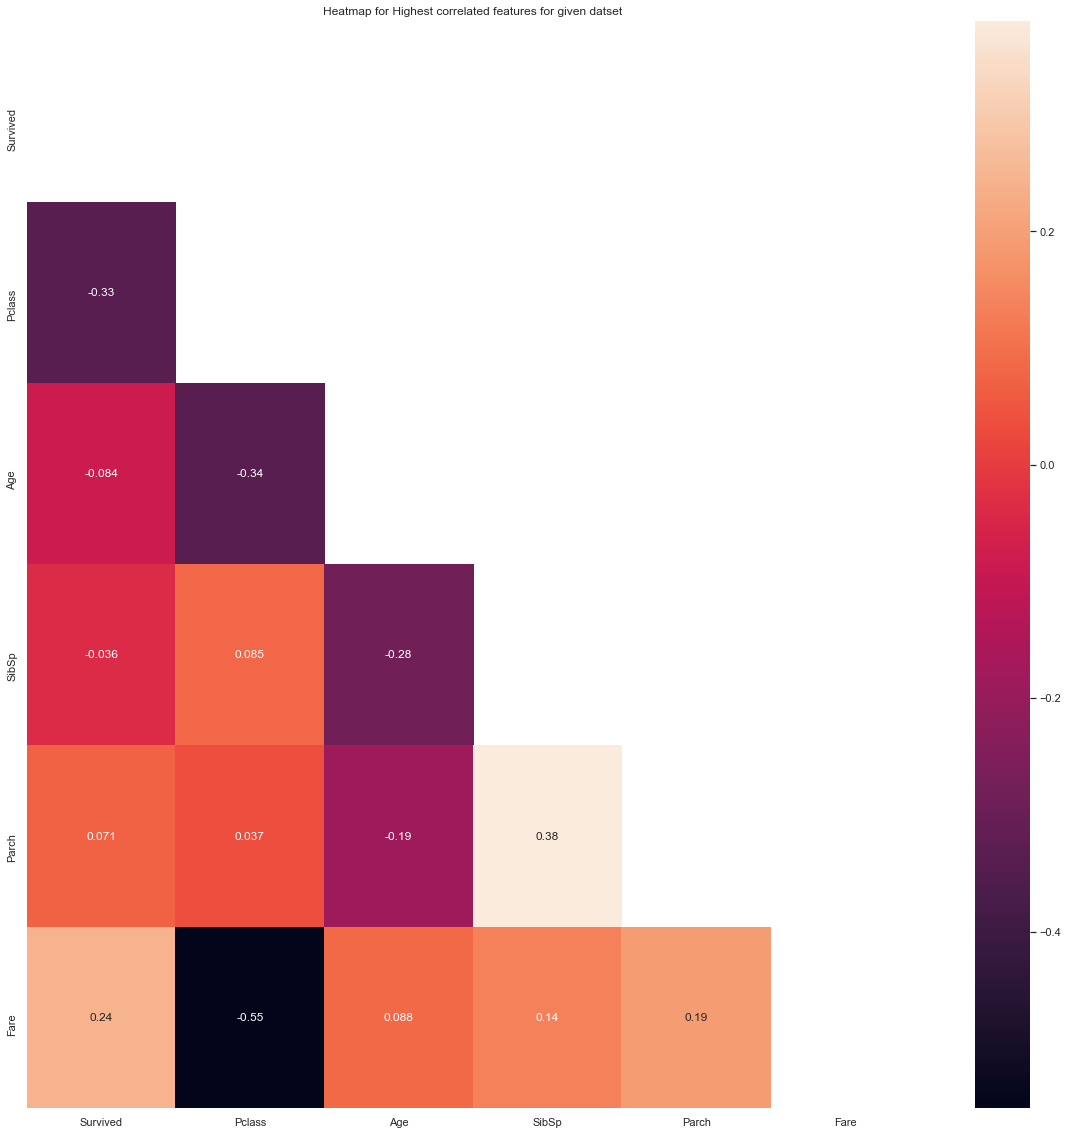

In [25]:
# correlation matrix heatmap visualization
plt.figure(figsize=(20,20))
sns.heatmap(titanic.corr(),mask=mask,annot=True,)
plt.title("Heatmap for Highest correlated features for given datset")

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  778 non-null    int64  
 1   Pclass    778 non-null    int64  
 2   Sex       778 non-null    object 
 3   Age       778 non-null    float64
 4   SibSp     778 non-null    int64  
 5   Parch     778 non-null    int64  
 6   Fare      778 non-null    float64
 7   Embarked  778 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.7+ KB


In [27]:
#changing the datatype of sex and embarked int to string
titanic['Sex'] = titanic['Sex'].astype(str)
titanic['Embarked'] = titanic['Embarked'].astype(str)

In [28]:
#LABEL ENCODING
# label encoding to clean up categorical data
categorical_data = {
    'Sex' : {'male':0,'female':1},
    'Embarked': {'C':0, 'Q':1, 'S':2} }
titanic = titanic.replace(categorical_data)

In [29]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [32]:
# split data to 80:20 ratio for cross validation set and test set.#using k-fold cross-validation
from sklearn.model_selection import train_test_split
cross_val_df,test_df= train_test_split(titanic,train_size=.8, test_size=.2, random_state=SEED)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)  

In [33]:
x_train=cross_val_df.drop('Survived',axis=1)
y_train=cross_val_df['Survived']
x_test=test_df.drop('Survived',axis=1)
y_test=test_df['Survived']

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [35]:
ypred=gnb.predict(x_test)
true_value=y_test
predicted_value=ypred

In [36]:
#accuracy score
print("Accuracy:",accuracy_score(true_value,predicted_value));

Accuracy: 0.7628205128205128


## EVALUATION OF THE MODEL METRICS

### Making the Confusion Matrix

[[78 13]
 [24 41]]
Test Data Accuracy Naive Bayesian Classifier: 0.7628


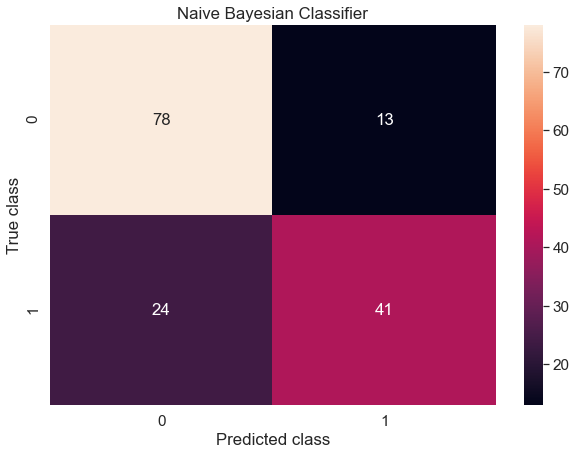

In [40]:
cm = confusion_matrix(y_true, y_pred) # rows = truth, cols = prediction
print(cm)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Naive Bayesian Classifier')
print("Test Data Accuracy Naive Bayesian Classifier: %0.4f" % accuracy_score(y_test, y_pred))

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
cm = confusion_matrix(y_true, y_pred)
print(cm)
print("\n",accuracy_score(y_true, y_pred))
print("\n",classification_report(y_true,y_pred))
print("Precision:",precision_score(y_true,y_pred))
print("Recall:",recall_score(y_true,y_pred))
print("f1-score:",f1_score(y_true,y_pred))


[[78 13]
 [24 41]]

 0.7628205128205128

               precision    recall  f1-score   support

           0       0.76      0.86      0.81        91
           1       0.76      0.63      0.69        65

    accuracy                           0.76       156
   macro avg       0.76      0.74      0.75       156
weighted avg       0.76      0.76      0.76       156

Precision: 0.7592592592592593
Recall: 0.6307692307692307
f1-score: 0.6890756302521008


## EVALUATION OF THE MODEL METRICS

* A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.
### Observation of model metrics
* **Precision:** 0.7592592592592593,
  **Recall:** 0.6307692307692307,
  **f1-score:** 0.6890756302521008
  
* **Precision**-It is the ‘Exactness’, ability of the model to return only relevant instances.
* **Recall**-It is the ‘Completeness’, ability of the model to identify all relevant instances.
* **F1 Measure**-Harmonic mean of Precision & Recall, used to indicate a balance between Precision & Recall providing each equal weightage, it ranges from 0 to 1.
* A GOOD MODEL INDICATES A HIGH VALUES IN DIAGONAL ELEMENTS AND LESS VALUES ON OFF-DIAGONALS ELEMENTS.